# Desafio Brasileirão Dataset

Você deverá gerar algumas informações sobre um dataset com informações do campeonato brasileiro de 2003 até 2022. O dataset poderá ser baixado [aqui](https://github.com/HenriqueWF/Serie_A_Campeonato_Brasileiro/blob/main/campeonato-brasileiro-full.csv). Não esqueça de salvar o arquivo no formato `.csv`. Você deverá responder a lista de perguntas abaixo:

In [ ]:
# Imports e criação do objeto dataframe
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar os dados aqui
df = pd.read_csv("https://raw.githubusercontent.com/HenriqueWF/Serie_A_Campeonato_Brasileiro/refs/heads/main/campeonato-brasileiro-full.csv")

df.info()


In [ ]:
# Parte 1 - Exploração Inicial

# 1. Quantas linhas e colunas o dataset possui?
df.shape

# 2. Quais são as colunas do dataset?
df = df.rename(columns={"rodata": "rodada"})
print(df.columns)

# 3. Há valores nulos? Quantos em cada coluna?
print(df.isnull().sum())

# 4. Liste os tipos de dados de cada coluna
print(df.dtypes)

# 5. Converta a coluna de data (se existente) para datetime e confirme a alteração.
df['data'] = pd.to_datetime(df['data'], dayfirst=True, errors='coerce')
print(df.head())
print(df.dtypes)


In [ ]:
# Parte 2 - Filtragem e Agrupamento

# 1. Quantos jogos terminaram empatados?
# Geramos um novo dataframe apenas com os jogos que terminaram empatados. Depois chamamos o atributo shape que é composto por uma tupla, onde o primeiro valor é a quantidade de linhas do dataframe, e o segundo é a quantidade de colunas.
qtd_jogos_empatados = df[df['mandante_Placar'] == df['visitante_Placar']].shape[0]
print(f"Quantidade de jogos que terminaram empatados: {qtd_jogos_empatados}.")

# 2. Qual foi a média de gols por jogo?
# Primeiro criamos uma nova coluna no dataframe que irá armazenar a soma dos gols dos mandantes e visitantes. Depois chamamos o método mean() para essa coluna.
df['total_gols'] = df['mandante_Placar'] + df['visitante_Placar']
media_gols_por_jogo = df['total_gols'].mean()
print(f"Média de gols por jogo: {media_gols_por_jogo:.2f}")

# 3. Crie uma tabela mostrando quantas vezes cada time jogou como mandante.
print(df['mandante'].value_counts())

# 4. Qual clube mais venceu como mandante?
clube_que_mais_venceu_como_mandante = df[df['vencedor'] == df['mandante']]['mandante'].value_counts().idxmax()
print(f"O clube que mais venceu como mandante foi o {clube_que_mais_venceu_como_mandante}.")

# 5. Quantas partidas tiveram 3 ou mais gols no total?
qtd_partidas_3oumais_gols = df[df['total_gols'] >= 3].shape[0]
print(f"{qtd_partidas_3oumais_gols} partidas tiveram 3 ou mais gols marcados")


Quantidade de vitórias dos mandantes: 4001.
Quantidade de vitórias dos visitantes: 1901.


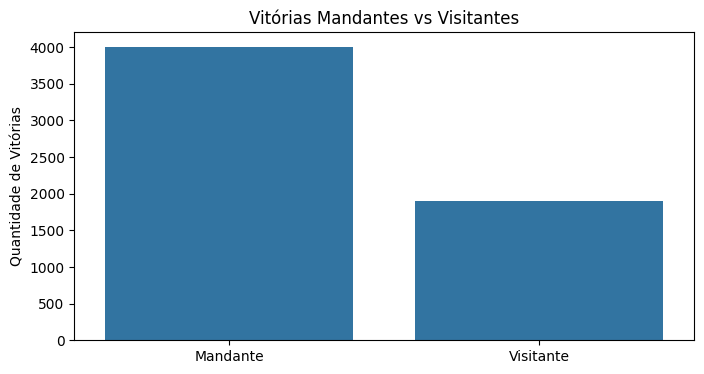

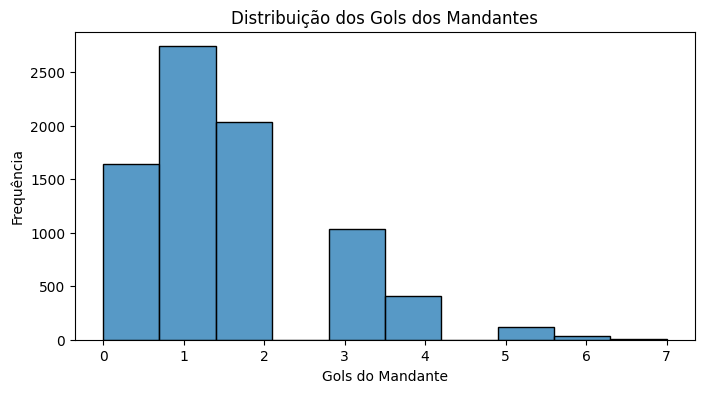

In [ ]:
# Parte 3 - Visualização

# 1. Gráfico de barras: Mostre a quantidade de vitórios dos mandantes vs visitantes
plt.figure(figsize=(8, 4))

vitorias_mandante = len(df[df['mandante_Placar'] > df['visitante_Placar']])
vitorias_visitante = len(df[df['visitante_Placar'] > df['mandante_Placar']])

print(f"Quantidade de vitórias dos mandantes: {vitorias_mandante}.")
print(f"Quantidade de vitórias dos visitantes: {vitorias_visitante}.")

sns.barplot(x=["Mandante", "Visitante"], y=[vitorias_mandante, vitorias_visitante])
plt.title("Vitórias Mandantes vs Visitantes")
plt.ylabel("Quantidade de Vitórias")
plt.show()

# 2. Gere um Histograma da quantidade de gols dos mandantes
plt.figure(figsize=(8, 4))

max_gols = df['mandante_Placar'].max()

bins = np.arange(0, max_gols + 2) + 0.5

sns.histplot(df['mandante_Placar'], bins=bins)
plt.title("Distribuição dos Gols dos Mandantes")
plt.xlabel("Gols do Mandante")
plt.ylabel("Frequência")
plt.show()

# 3. Gere um boxplot da distribuição total de gols por jogo
